In [116]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [122]:
# Paso 1: Cargar el dataset y realizar un análisis exploratorio
data = pd.read_csv(r'C:\Users\juans\Downloads\Anexo 2 - Dataset Vehicle\car data.csv')

In [152]:
# Cargar los datos
data = pd.read_csv(r'C:\Users\juans\Downloads\Anexo 2 - Dataset Vehicle\car data.csv')

# 1. Análisis exploratorio de datos
print("Primeras filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nResumen estadístico de los datos numéricos:")
print(data.describe())

Primeras filas del dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Pric

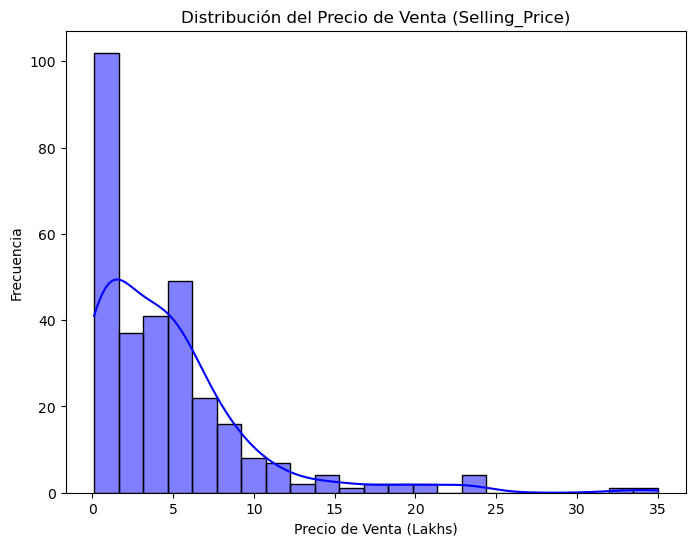

In [154]:
# Distribución de la variable objetivo (Selling_Price)
plt.figure(figsize=(8, 6))
sns.histplot(data['Selling_Price'], kde=True, color='blue')
plt.title('Distribución del Precio de Venta (Selling_Price)')
plt.xlabel('Precio de Venta (Lakhs)')
plt.ylabel('Frecuencia')
plt.show()

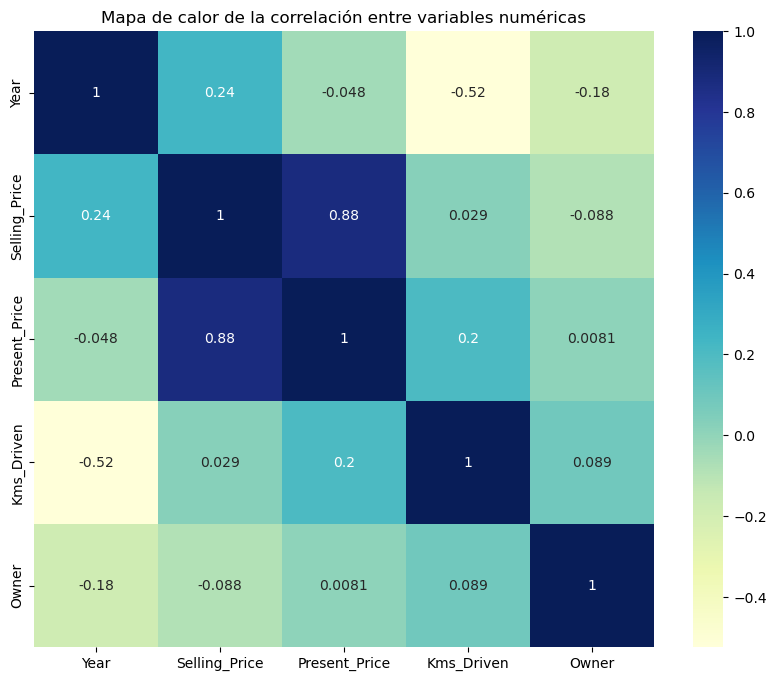

In [158]:
# Mapa de calor para ver la correlación entre variables numéricas
plt.figure(figsize=(10, 8))

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Crear el mapa de calor de correlación
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()


In [160]:
# 2. Preprocesamiento de datos
# Eliminar columnas irrelevantes
data = data.drop(['Car_Name'], axis=1)

In [162]:
# Convertir variables categóricas en variables dummies
data = pd.get_dummies(data, drop_first=True)

In [164]:
# 3. Selección de características
# (Aquí ya hemos convertido variables categóricas y eliminado 'Car_Name' que no aporta al modelo)

# 4. División de los datos en entrenamiento y prueba
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
# 5. Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [170]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nResultados del modelo:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Resultados del modelo:
Mean Squared Error (MSE): 3.478803970647689
Root Mean Squared Error (RMSE): 1.8651552135540057
R^2 Score: 0.8489813024894818


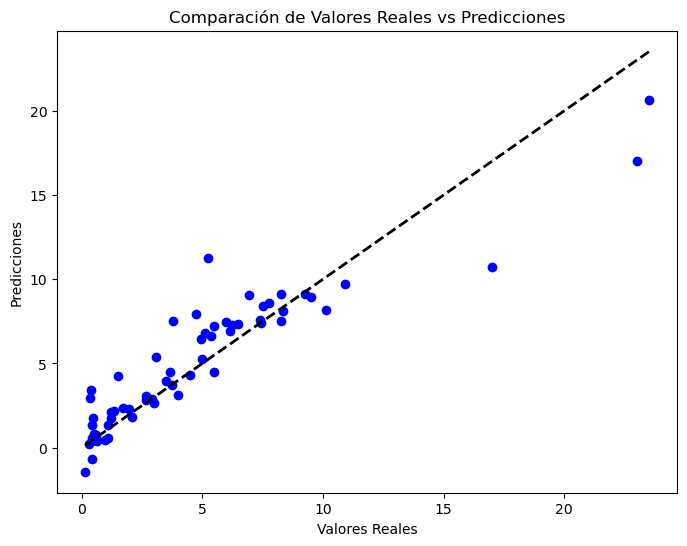

In [172]:
# 7. Visualización de resultados
# Gráfico de dispersión entre valores reales y predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

In [174]:
# 8. Interpretación de los resultados
print("\nInterpretación:")
print("El R^2 Score nos muestra qué tan bien se ajusta el modelo a los datos. Valores cercanos a 1 indican un buen ajuste.")
print("El RMSE indica el error promedio en las predicciones; valores menores significan un modelo más preciso.")


Interpretación:
El R^2 Score nos muestra qué tan bien se ajusta el modelo a los datos. Valores cercanos a 1 indican un buen ajuste.
El RMSE indica el error promedio en las predicciones; valores menores significan un modelo más preciso.
